In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We create our own solver to decompose a matrix using SVD

In [9]:
def getSVD(A):
    #We compute A^T.A
    m,n = A.shape
    ATA = np.dot(np.transpose(A),A)
    #We find eigentvectors/ eigenvaslues of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    #Compute singular values
    singular_values = np.sqrt(eigenvalues)
    sigma = singular_values[:n]
    #Compute the right singular matrix V
    V = eigenvectors
    # Compute the norms of each column
    norms = np.linalg.norm(V, axis=0)  
    # Normalize each column of V
    V=V/norms
    #Compute the left singular matrix U
    U = np.dot(A, V) / sigma
    return U,sigma,V.T

We show our example on simple array

In [10]:
A = np.array([[1, 2, 3],[4, 5, 6],[7,8,9], [10, 11, 12]])
print(A)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [11]:
using_svd = np.linalg.svd(A)
using_solver = getSVD(A)

In [12]:
print(using_solver)
print(using_svd)

(array([[-1.40876677e-01,  8.24714352e-01,  2.81963011e-07],
       [-3.43946294e-01,  4.26263940e-01,  1.36810455e-07],
       [-5.47015912e-01,  2.78135286e-02, -1.00105211e-08],
       [-7.50085529e-01, -3.70636883e-01, -1.53494657e-07]]), array([2.54624074e+01, 1.29066168e+00, 1.33086741e-07]), array([[-0.50453315, -0.5745157 , -0.64449826],
       [-0.76077568, -0.05714052,  0.64649464],
       [ 0.40824829, -0.81649658,  0.40824829]]))
(array([[-0.14087668,  0.82471435,  0.54482013,  0.0563119 ],
       [-0.34394629,  0.42626394, -0.76839925,  0.33100241],
       [-0.54701591,  0.02781353, -0.09766188, -0.83094053],
       [-0.75008553, -0.37063688,  0.321241  ,  0.44362621]]), array([2.54624074e+01, 1.29066168e+00, 1.76998476e-15]), array([[-0.50453315, -0.5745157 , -0.64449826],
       [-0.76077568, -0.05714052,  0.64649464],
       [-0.40824829,  0.81649658, -0.40824829]]))


IMAGE COMPRESSION

In [13]:
#We import image from path
image = mpimg.imread('husky.jpg')

In [14]:
print(image.shape)

(1500, 1000, 3)


In [15]:
grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

In [16]:
print(grayscale_image.shape)

(1500, 1000)


Apply SVD to the image matrix using our solver:

In [39]:
U, S, V = np.linalg.svd(grayscale_image)

In [40]:
print(U.shape)
print(S.shape)
print(V.shape)

(1500, 1500)
(1000,)
(1000, 1000)


In [51]:
#We use the first k significant Matrix approximations and sum them together to get our compressed image
ks=[10, 20, 65, 100, 250]

In [62]:
def plot_compressed_image(compressed_image,k):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(grayscale_image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(compressed_image, cmap='gray')
    heading = "Compressed( "+str(k/10)+" percent storage)"
    axs[1].set_title(heading)
    axs[1].axis('off')

    plt.show()

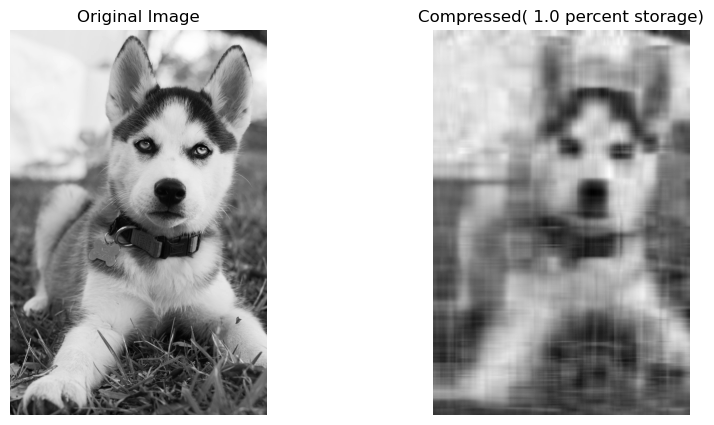

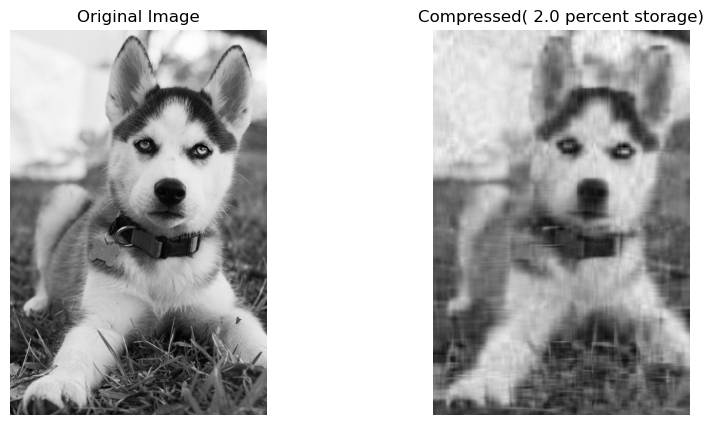

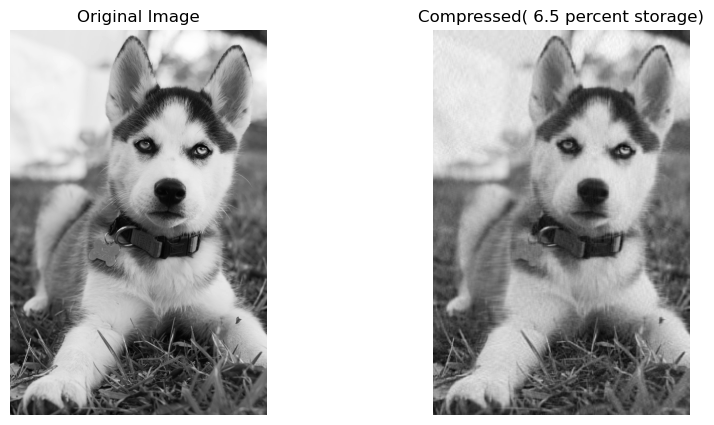

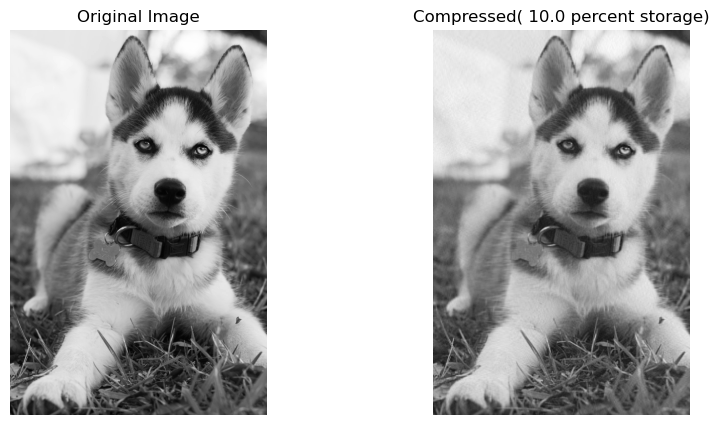

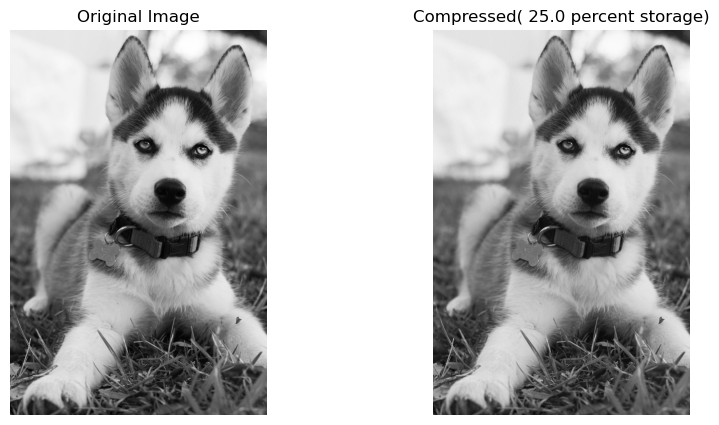

In [63]:
for k in ks:
    #take first k columns of U
    compressed_U = U[:, :k]
    #take first k values of S
    compressed_S = np.diag(S[:k])
    #take first k rows of V.T
    compressed_V = V[:k, :]
    #We now reconstruct the compressed image
    compressed_image = np.dot(np.dot(compressed_U, compressed_S), compressed_V)
    plot_compressed_image(compressed_image,k)


In [176]:
#We add a digital watermark to the original image

#U_com, S_com, V_com = np.linalg.svd(compressed_image)

In [183]:
# Assuming you want to modify the third least significant approximation rank-1 matrix
#approximation_matrix = np.outer(U_com[:, -3], V_com[-3, :]) * S_com[-3]
#print(approximation_matrix.shape)

(1500, 1000)


We now show a graph which portrays what percentage of the data is needed to retain a certain amount of information

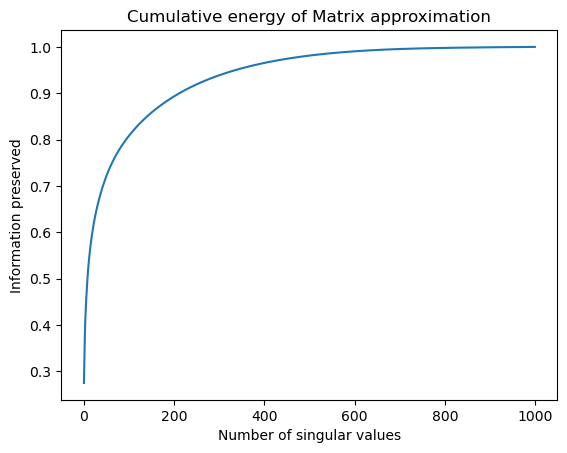

In [67]:
x_axis = []
y_axis = []
sum=0
sum_of_s = np.sum(S)
for i in range(1000):
    sum=sum+S[i]
    x_axis.append(i)
    y_axis.append(sum/sum_of_s)

plt.plot(x_axis, y_axis)
plt.title('Cumulative energy of Matrix approximation')
plt.xlabel('Number of singular values')
plt.ylabel('Information preserved')
plt.show()

We now apply the same to the coloured image where we will have to apply SVD to each color separately

In [87]:
# Calculate the number of singular values to retain
ks = [10, 20, 65, 100, 250]

In [88]:
def plot_color(compressed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(compressed_image)
    heading = "Compressed( "+str(k/10)+" percent storage)"
    axs[1].set_title(heading)
    axs[1].axis('off')

    plt.show()

(1500, 1000, 3)


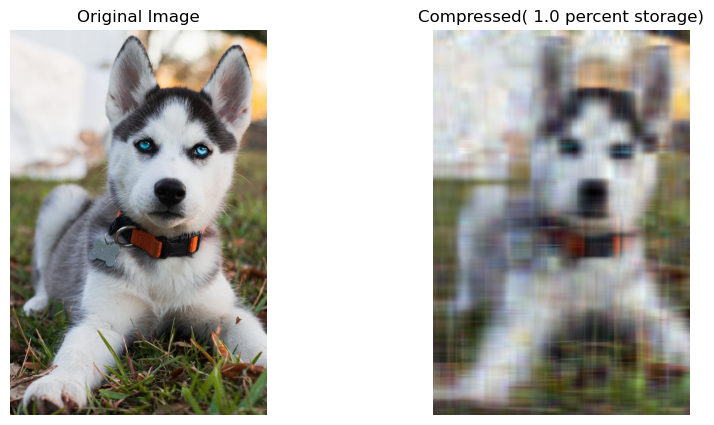

(1500, 1000, 3)


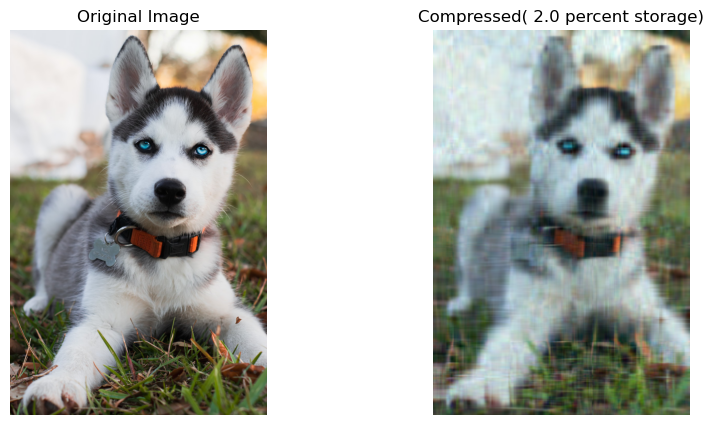

(1500, 1000, 3)


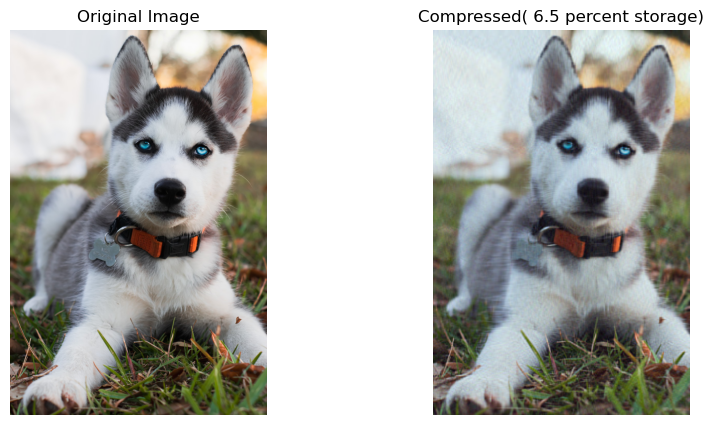

(1500, 1000, 3)


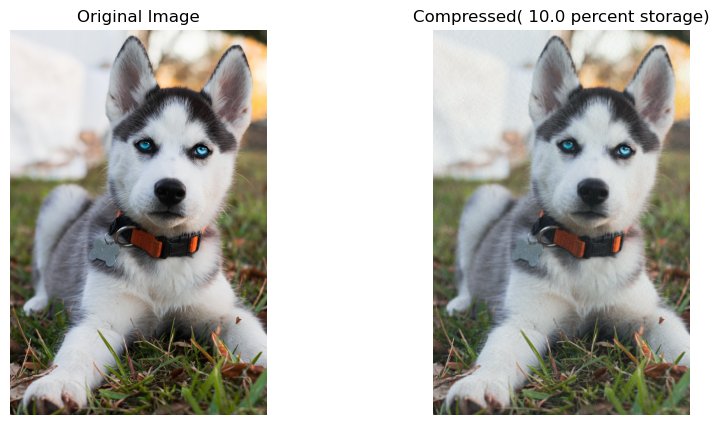

(1500, 1000, 3)


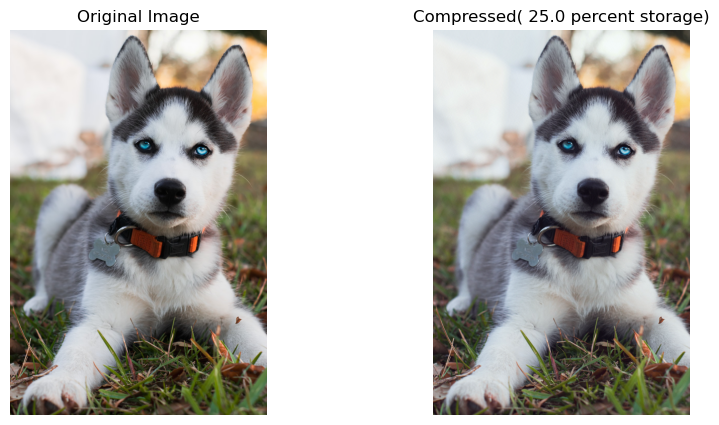

In [89]:
for k in ks:
    compressed_channels = []
    for channel in range(3):
        # Extract the color channel
        color_channel = image[:, :, channel]
        
        # Apply SVD to the color channel
        #Here we use the imported SVD algortithm from numpy
        U_channel, S_channel, V_channel = np.linalg.svd(color_channel)
        
        # Truncate the singular value matrices
        compressed_U_channel = U_channel[:, :k]
        compressed_S_channel = np.diag(S_channel[:k])
        compressed_V_channel = V_channel[:k, :]
        
        # Reconstruct the compressed color channel
        compressed_channel = np.dot(np.dot(compressed_U_channel, compressed_S_channel), compressed_V_channel)

        # Normalize the channel to 0-1 range
        compressed_channel = (compressed_channel - compressed_channel.min()) / (compressed_channel.max() - compressed_channel.min())        
        # Scale the channel to 0-255 range
        compressed_channel = (compressed_channel * 255).astype(np.uint8)
            
        # Append the compressed color channel to the list
        compressed_channels.append(compressed_channel)

    # Convert the list of compressed color channels to an array
    compressed_image = np.stack(compressed_channels, axis=-1)
    print(compressed_image.shape)

    plot_color(compressed_image, k)